In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

from utils import DataSet, generate_features_for_smiles, grid_search, plot_results

pd.set_option('display.max_rows', None)

Loading model: LEC_RF_200_July26
Test R2 score: 0.824


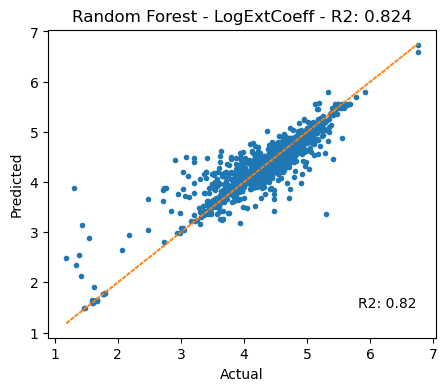

In [3]:
lec_data = DataSet(target="LogExtCoeff", fill_na="drop", drop_features=["Ipc"])

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_params = {
    "n_estimators": [100],
    "max_depth": [20],
}

grid, y_pred, r2 = grid_search(
    estimator=rf, params=grid_params, data=lec_data, model_name="LEC_RF_200_July26"
)

plot_results(
    y=lec_data.y_test["LogExtCoeff"],
    y_hat=y_pred,
    title=f"Random Forest - LogExtCoeff - R2: {r2:.3f}",
)

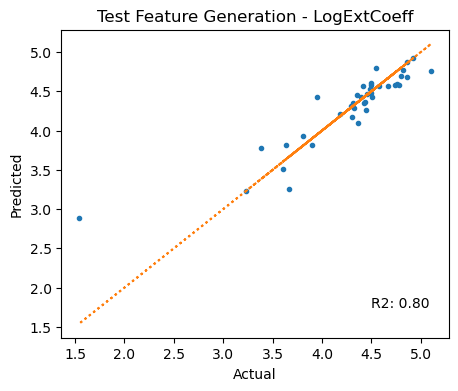

In [4]:
# Testing feature generation functions
sample_y = lec_data.y_test.sample(40, random_state=42)
smiles = sample_y['SMILES'].tolist()

features_df = generate_features_for_smiles(
    smiles,
    descriptors=grid.feature_names_in_, # type: ignore
    missing_value=None,
    log_missing=True)

pred_from_features = grid.predict(features_df)

plot_results(
    y=sample_y["LogExtCoeff"],
    y_hat=pred_from_features,
    title=f"Test Feature Generation - LogExtCoeff",
)

In [5]:
# now look at fluorene test data
# load belfield_LMA.parquet
belfield_LEC = pd.read_parquet('data/belfield_LEC.parquet')
# rename LMA column to "LambdaMaxAbs"
belfield_LEC.rename(columns={'LEC': 'LogExtCoeff'}, inplace=True)
belfield_LEC.head()

,smiles,LogExtCoeff
23,C=1C=CC(=CC1)N(C=2C=CC=CC2)C3=CC=C(C=CC=4C=CC=...,5.000000
26,C=1C=CC(=CC1)N(C=2C=CC=CC2)C3=CC=C(C=CC=4C=CC5...,5.000000
28,C=1C=CC(=CC1)N(C=2C=CC=CC2)C3=CC=C(C=CC4=CC=C5...,5.477121
29,O=N(=O)C1=CC=C2C3=CC=C(C=CC4=CC=C5C6=CC=C(C=C6...,4.582745
30,N1=C(SC2=CC=CC=C12)C3=CC=C4C5=CC=C(C=CC6=CC=C7...,5.012837


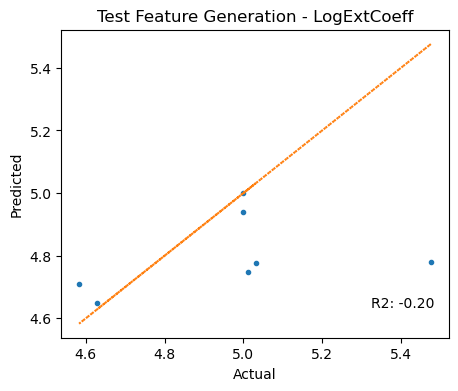

In [7]:
# Testing feature generation functions with belfield dataset
smiles_belfield = belfield_LEC['smiles'].tolist()

belfield_features_df = generate_features_for_smiles(
    smiles_belfield,
    descriptors=grid.feature_names_in_, # type: ignore
    missing_value=None,
    log_missing=True)

pred_from_features = grid.predict(belfield_features_df)

plot_results(
    y=belfield_LEC["LogExtCoeff"],
    y_hat=pred_from_features,
    title=f"Test Feature Generation - LogExtCoeff",
)